In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap


In [ ]:
# Upload the dataset file 'user_data.csv' using Colab's file upload widget
from google.colab import files
uploaded = files.upload()

Saving user_data.csv to user_data (1).csv


In [ ]:
# Ensure the uploaded file is in the current directory
import shutil
shutil.move(list(uploaded.keys())[0], 'user_data.csv')


'user_data.csv'

In [ ]:
# Import the dataset
dataset = pd.read_csv('user_data.csv')

In [ ]:
# Select features and target variable
x = dataset.iloc[:, :-1].values  # First two columns as features
y = dataset.iloc[:, -1].values    # Third column as the target variable

In [ ]:
# Split the dataset into the Training set and Test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [ ]:
# Feature Scaling
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
# Check for missing values in y_train
missing_values = np.isnan(y_train)

# Remove rows with missing values
x_train = x_train[~missing_values]
y_train = y_train[~missing_values]

In [ ]:
# Fitting Naive Bayes to the Training set
classifier = GaussianNB()
classifier.fit(x_train, y_train)


GaussianNB()

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(x_test)

In [ ]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

In [ ]:
# Visualizing the Training set results
def plot_results(x_set, y_set, title):
    X1, X2 = np.meshgrid(
        np.arange(start=x_set[:, 0].min() - 1, stop=x_set[:, 0].max() + 1, step=0.01),
        np.arange(start=x_set[:, 1].min() - 1, stop=x_set[:, 1].max() + 1, step=0.01)
    )
    plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha=0.75, cmap=ListedColormap(['purple', 'green']))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                    c=ListedColormap(['purple', 'green'])(i), label=j)
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()


<ipython-input-31-2b601cdc7e0a>:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],


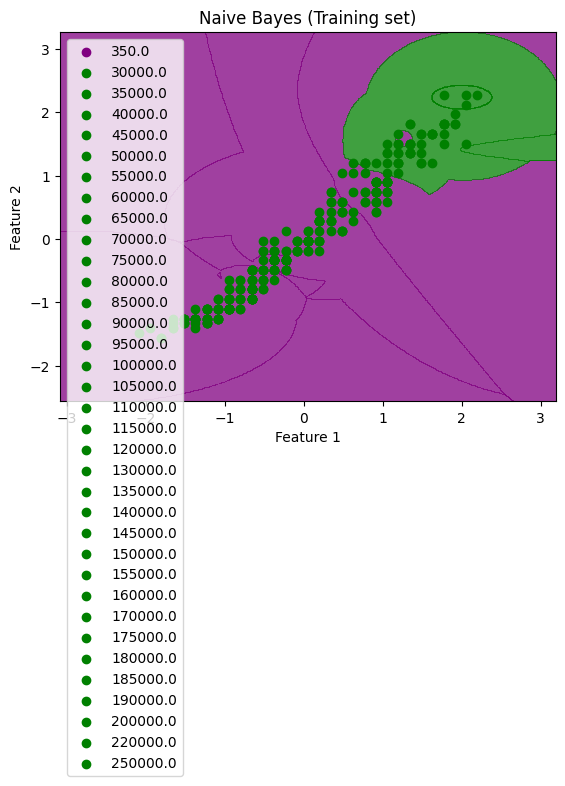

In [ ]:
# Visualizing the Training set results
plot_results(x_train, y_train, 'Naive Bayes (Training set)')

<ipython-input-31-2b601cdc7e0a>:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],


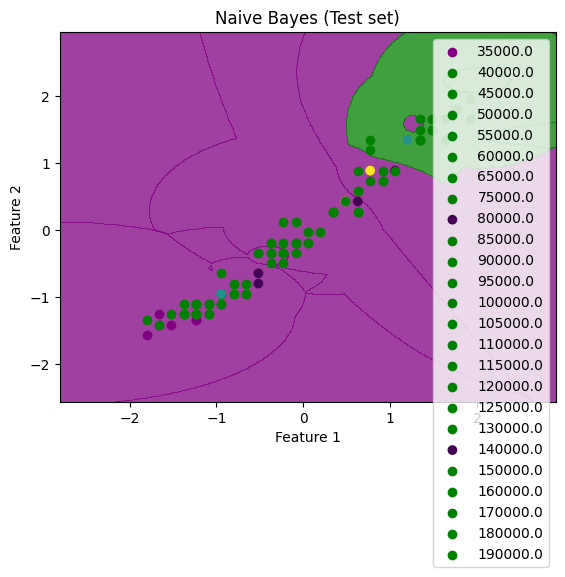

In [ ]:
# Visualizing the Test set results
plot_results(x_test, y_test, 'Naive Bayes (Test set)')